## 1. Necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

## 2.1 Get an image

Image used in this notebook: Photo by <a href="https://unsplash.com/@coramaureen?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Cora Leach</a> on <a href="https://unsplash.com/s/photos/landscapes?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## 2.2 Read in the image as a NumPy array
  

In [2]:
img_arr = img.imread('/content/sample_image.jpg')
print(img_arr.shape)

(457, 640, 3)


## 2.3 Display the original image

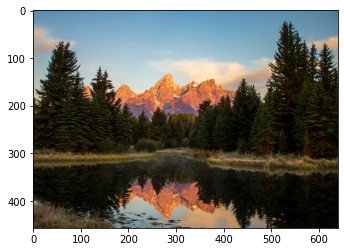

In [3]:
plt.imshow(img_arr)

## 3. Let's begin the color quantization process

### Reshape image array

In [6]:
(h,w,c) = img_arr.shape
img2D = img_arr.reshape(h*w,c)
print(img2D)
print(img2D.shape)

[[ 90 134 169]
 [ 90 134 169]
 [ 91 135 170]
 ...
 [ 22  21  16]
 [  5   4   0]
 [  4   3   0]]
(292480, 3)


## 4. Apply K-Means Clustering

In [8]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=7) # we shall retain only 7 colors
cluster_labels = kmeans_model.fit_predict(img2D)

In [9]:
print(cluster_labels)

[4 4 4 ... 0 0 0]


In [11]:
from collections import Counter
labels_count = Counter(cluster_labels)
print(labels_count)

Counter({0: 104575, 6: 49581, 4: 36725, 5: 34004, 2: 26165, 3: 23453, 1: 17977})


In [13]:
print(kmeans_model.cluster_centers_)

[[ 16.33839194  14.55113194   5.10185087]
 [218.18966094 213.72629935 201.77520633]
 [103.89269832  85.21711201  65.79896613]
 [197.64774759 130.96223282  92.92893639]
 [110.49899467 154.81760135 182.03880013]
 [158.7716262  182.74213392 192.84830022]
 [ 49.82493331  43.39654239  24.07867873]]


## 5. Convert Cluster Centers to RGB values (in int)

In [14]:
rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int)

In [15]:
print(rgb_cols)

[[ 16  15   5]
 [218 214 202]
 [104  85  66]
 [198 131  93]
 [110 155 182]
 [159 183 193]
 [ 50  43  24]]


## 6. Assign all cluster points to be equal to the cluster center

### This way all colors in the image are now mapped to one of the 7 colors corresponding to the cluster centers

In [16]:
img_quant = np.reshape(rgb_cols[cluster_labels],(h,w,c))

## 7. Display the color quantized image 

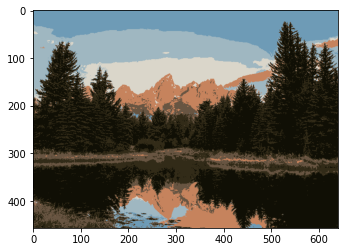

In [17]:
plt.imshow(img_quant)

Text(0.5, 1.0, 'Color Quantized Image')

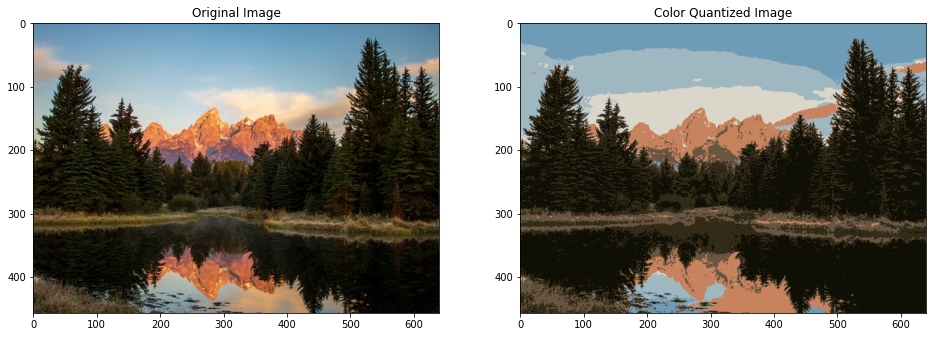

In [24]:
fig, ax = plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(img_arr)
ax[0].set_title('Original Image')
ax[1].imshow(img_quant)
ax[1].set_title('Color Quantized Image')